Ран для предобработки до момента X_train, y_train и X_test, y_test

In [5]:
titanic_data = pd.read_csv('train.csv')
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_data.Survived
X = pd.get_dummies(X)
X = X.fillna({'Age': X.Age.median()})
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

## 0. Запуск

In [2]:
import pandas as pd
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

n:\anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
plt.rcParams["figure.figsize"] = (12, 9) # (w, h)

In [4]:
titanic_data = pd.read_csv('train.csv')

In [5]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Задача**: обучить дерево решений, которое будет предсказывать выжил пассажир или нет, основываясь на текущих данных

## 1. Предобработка данных

### 1.1 Колонки и пропуски

In [6]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Отбрасываем поля: PassengerId, Cabin, Ticket, Name + Survived, т.к. это основная переменная Y

In [7]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)

In [8]:
y = titanic_data.Survived

### 1.2 Ошибки предобработки

#### Ошибка 1: строковый формат

Данный метод загрузки данных в дерево решений предполагает существование всех переменных в бинарной классификации (1 или 0)\
Поэтому необходимо строковые данные перевести в другой формат.\
\
Существуют разные вариации перевода. Например, пол можно перевести:
* в две колонки: 
    * мужскую "1 - мужчина, 0 - нет"
    * женскую "1 - женщина, 0 - нет"
* одну общую: "1 - мужчина, 0 - женщина"\

Наиболее простой метод - вызов функции `pandas.get_dummies()`

In [10]:
X = pd.get_dummies(X)

In [11]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,3,NaN,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


#### Ошибка 2: наличие пропусков

В колонке `age` находится много необработанных пропусков.\
Лучшим решением было бы обучение модели сначала на заполнение пропусков с предположением возраста.\
Однако пока **заполним** условной переменной - **медианой возраста**.

In [12]:
X = X.fillna({'Age': X.Age.median()})

In [13]:
#проверка
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

## 2. Обучение модели

### 2.1. Переобучение или overfitting

#### Построение дерева решений "в лоб"

Создание дерева решений `tree`

In [9]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [14]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

Визуализация

[Text(0.43285954607664234, 0.975, 'Sex_male <= 0.5\nentropy = 0.961\nsamples = 891\nvalue = [549, 342]\nclass = Negative'),
 Text(0.15807481751824817, 0.925, 'Pclass <= 2.5\nentropy = 0.824\nsamples = 314\nvalue = [81, 233]\nclass = Positive'),
 Text(0.06204379562043796, 0.875, 'Fare <= 28.856\nentropy = 0.299\nsamples = 170\nvalue = [9, 161]\nclass = Positive'),
 Text(0.04744525547445255, 0.825, 'Fare <= 28.231\nentropy = 0.469\nsamples = 70\nvalue = [7, 63]\nclass = Positive'),
 Text(0.040145985401459854, 0.775, 'Age <= 23.5\nentropy = 0.426\nsamples = 69\nvalue = [6, 63]\nclass = Positive'),
 Text(0.032846715328467155, 0.725, 'entropy = 0.0\nsamples = 15\nvalue = [0, 15]\nclass = Positive'),
 Text(0.04744525547445255, 0.725, 'Age <= 27.5\nentropy = 0.503\nsamples = 54\nvalue = [6, 48]\nclass = Positive'),
 Text(0.029197080291970802, 0.675, 'Age <= 25.5\nentropy = 0.845\nsamples = 11\nvalue = [3, 8]\nclass = Positive'),
 Text(0.014598540145985401, 0.625, 'Fare <= 13.75\nentropy = 0.5

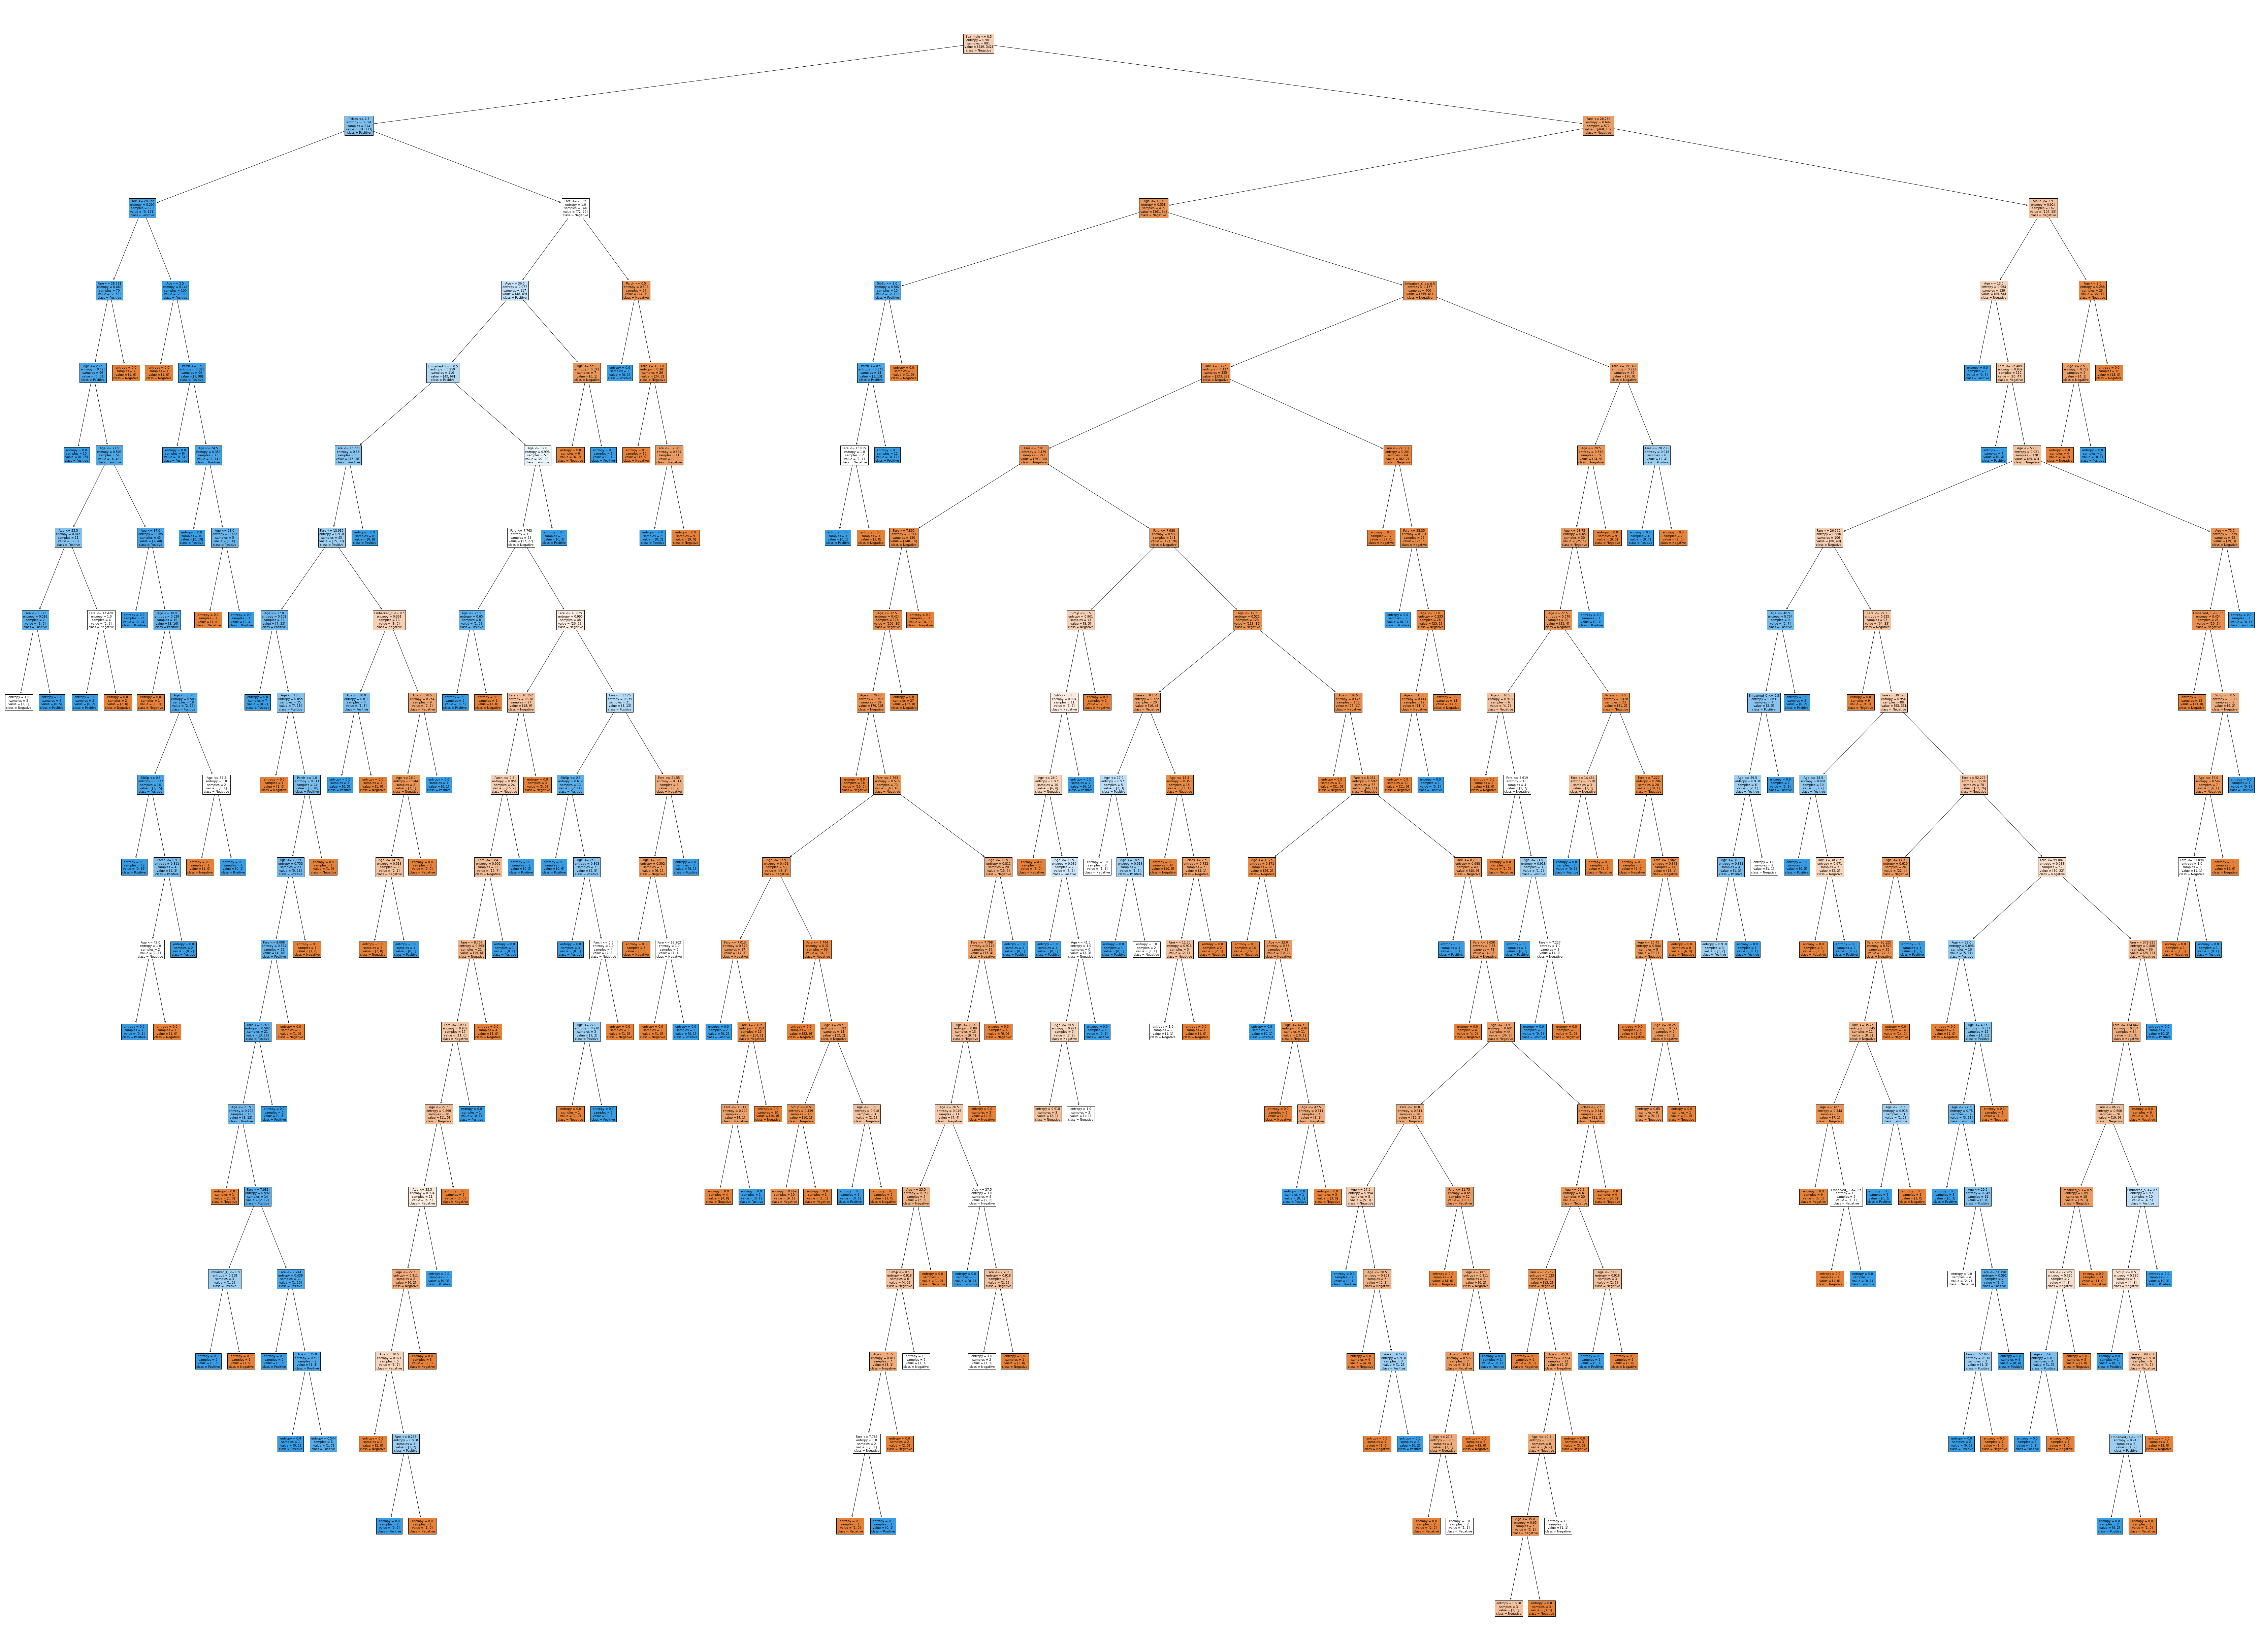

In [15]:
tree.plot_tree(clf, feature_names=list(X),
               class_names=['Negative', 'Positive'],
               filled=True)

**Проблема**: сильное переобучение - большое количество решений до тех пор, пока возможно снижение энтропии

Мы сказали дереву решений `tree` безошибочно классифицировать все наблюдения в данных, вместо поиска оптимального алгоритма

#### Предсказание на *train* и *test*

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

`test_size` - объем тестируемой выборки (33% в данном случае)\
`random_state` - воспроизводимый рандомный набор данных (любое, отличное от `None`)

In [18]:
print(X_train.shape,\
      X_test.shape,\
        y_train.shape,\
        y_test.shape)

(596, 10) (295, 10) (596,) (295,)


Проверка на тех же данных, на которых построена модель

In [19]:
clf.score(X, y)

0.9797979797979798

Обучим тем же методом "в лоб" `train` выборку

In [20]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

Точность на множестве `train`, на котором обучили

In [21]:
clf.score(X_train, y_train)

0.9798657718120806

Точность на множестве `test`, который модель не видела

In [22]:
clf.score(X_test, y_test)

0.7728813559322034

#### Параметр глубины

Внесем ограничение глубины по поиску энтропии до 5 `max_depth=`

In [23]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [24]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [25]:
clf.score(X_train, y_train)

0.8238255033557047

In [26]:
clf.score(X_test, y_test)

0.8203389830508474

Таким образом, предсказание на неизвестных данных **увеличилось с 76% до 82%**

#### Перебор параметра глубины дерева

In [27]:
max_depth_value = range(1, 100) # глубина дерева должна начаться с 1, а не с 0

In [28]:
scores_data = pd.DataFrame()

In [29]:
for max_depth in max_depth_value:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)

    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score], 
                                    'test_score': [test_score]})
    scores_data = scores_data.append(temp_score_data) #scores_data = pd.concat([scores_data, temp_score_data])

C:\Users\Никита\AppData\Local\Temp\ipykernel_2208\856604557.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\Никита\AppData\Local\Temp\ipykernel_2208\856604557.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\Никита\AppData\Local\Temp\ipykernel_2208\856604557.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\Никита\AppData\Local\Temp\ipykernel_2208\856604557.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_scor

In [30]:
scores_data.head()

,max_depth,train_score,test_score
0,1,0.781879,0.796610
0,2,0.805369,0.776271
0,3,0.823826,0.820339
0,4,0.833893,0.823729
0,5,0.840604,0.810169


In [31]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'],
                           value_vars=['train_score', 'test_score'],
                           var_name='set_type',
                           value_name='score')

In [32]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


<AxesSubplot:xlabel='max_depth', ylabel='score'>

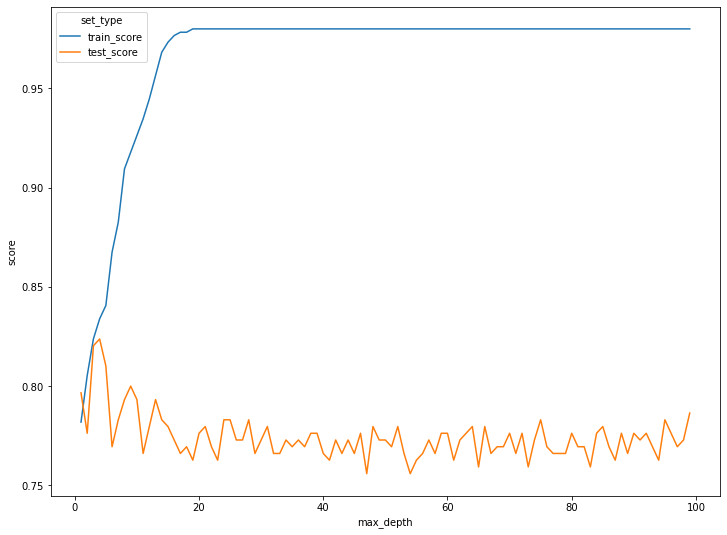

In [36]:
sns.lineplot(data=scores_data_long, x='max_depth', y='score', hue='set_type')

**Ошибка** данного метода оптимизации - переобучение на одной выборке\
Вместо поиска алгоритма для обучения, мы подстраиваем разные параметры (в данном случае, `max_depth`) под одну и ту же выборку

### 2.2. Кросс-валидация модели

#### Основной метод

Суть метода заключается в работе с `train_data`:
1. данный сет разбивается на некоторое количество сплитов, например, 5;
2. по каждому сплиту проходит обучение на 4 из 5 наборах, а на 5-ом тестируется;
3. по каждому сплиту получается разная точность определения на псевдотестовых выборках из сплитов;
4. усредняется значение предсказания по всем вариантам обучения

In [37]:
from sklearn.model_selection import cross_val_score

In [38]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

`cv=5` - количество сплитов

In [39]:
cross_val_score(clf, X_train, y_train, cv=5)

array([0.76666667, 0.82352941, 0.78991597, 0.75630252, 0.80672269])

In [40]:
cross_val_score(clf, X_train, y_train, cv=5).mean()

0.7886274509803922

Исправим модель подбора глубины, добавив кросс-валидацию

In [41]:
max_depth_value = range(1, 100)
scores_data = pd.DataFrame()

In [42]:
for max_depth in max_depth_value:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)

    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean() # изменение 1

    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score], 
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]}) # изменение 2
    
    scores_data = scores_data.append(temp_score_data) #scores_data = pd.concat([scores_data, temp_score_data])

C:\Users\Никита\AppData\Local\Temp\ipykernel_2208\2993134772.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data) #scores_data = pd.concat([scores_data, temp_score_data])
C:\Users\Никита\AppData\Local\Temp\ipykernel_2208\2993134772.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data) #scores_data = pd.concat([scores_data, temp_score_data])
C:\Users\Никита\AppData\Local\Temp\ipykernel_2208\2993134772.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data) #scores_data = pd.concat([scores_data, temp_score_data])
C:\Users\Никита\AppData\Local\Temp\ipykernel_2208\2993134772.py:14: Fu

In [44]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.806780,0.793669


In [45]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'],
                           value_vars=['train_score', 'test_score', 'cross_val_score'], # новый ключ
                           var_name='set_type',
                           value_name='score')

<AxesSubplot:xlabel='max_depth', ylabel='score'>

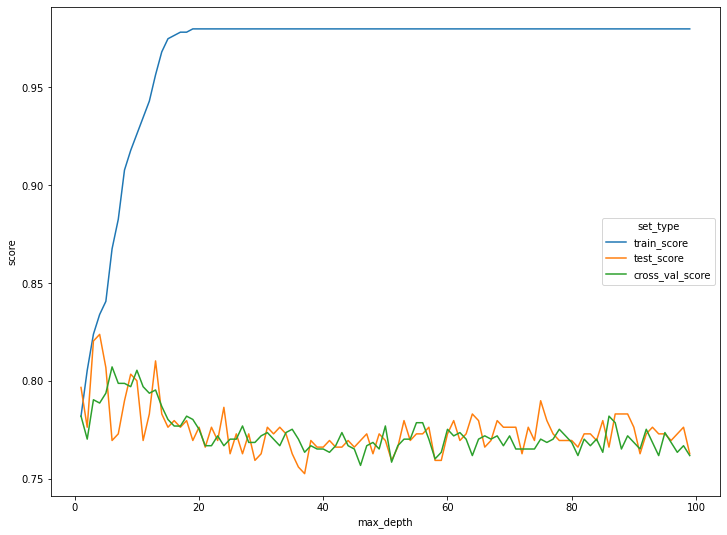

In [46]:
sns.lineplot(data=scores_data_long, x='max_depth', y='score', hue='set_type')

Проверка на тестовом множестве, которое не было видно

In [47]:
scores_data_long.query("set_type == 'cross_val_score'").head(20)

,max_depth,set_type,score
198,1,cross_val_score,0.781961
199,2,cross_val_score,0.770196
200,3,cross_val_score,0.790322
201,4,cross_val_score,0.788627
202,5,cross_val_score,0.793669
203,6,cross_val_score,0.807115
204,7,cross_val_score,0.798697
205,8,cross_val_score,0.798683
206,9,cross_val_score,0.797003
207,10,cross_val_score,0.805392


Можно увидеть, что при глубине 10 достигается максимальный показатель 0.805392, а далее идет на убыль

Подставляем данную глубину для тестирования на `test_data`, которую модель не видела

In [48]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [51]:
best_clf.fit(X_train, y_train)

best_clf.score(X_test, y_test)

0.8067796610169492

#### Метод GridSearchCV

Метод позволяет применить обучение на модели с разными изменяемыми параметрами и отобрать лучшие из них с помощью кросс-валидации\
\
*Иначе говоря, сделать все, что было выше - одним методом*

В качестве результата можно получить разные метрики:
* accuracy;
* f1-мера;
* precision;
* recall;
* roc_auc;
* *и другие ...*

In [6]:
from sklearn.model_selection import GridSearchCV

In [7]:
clf = tree.DecisionTreeClassifier()

In [8]:
parametrs = {'criterion': ['gini','entropy'], 'max_depth': range(1,30)}

In [9]:
grid_search_cv_clf = GridSearchCV(clf, parametrs, cv=5)

In [10]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [11]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 11}

In [12]:
best_clf = grid_search_cv_clf.best_estimator_

In [13]:
best_clf

DecisionTreeClassifier(criterion='entropy', max_depth=11)

Далее: оставшиеся неиспользованные параметры можно добавить в `parametrs` (и подобрать?), чтобы улучшить модель обучения

## 3. Параметры

### Precision и recall

In [18]:
from sklearn.metrics import precision_score, recall_score

In [16]:
y_pred = best_clf.predict(X_test)

In [17]:
precision_score(y_test, y_pred)

0.75

In [19]:
recall_score(y_test, y_pred)

0.65

То, что хранится в предсказании дерева можно вытянуть через `.predict_proba()` - предсказанная вероятность отнесения к одному из двух классов

In [20]:
y_predicted_prob = best_clf.predict_proba(X_test)

In [21]:
y_predicted_prob

array([[0.42857143, 0.57142857],
       [0.5       , 0.5       ],
       [0.86206897, 0.13793103],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.14285714, 0.85714286],
       [0.86206897, 0.13793103],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.91666667, 0.08333333],
       [0.72727273, 0.27272727],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.71428571, 0.28571429],
       [0.96511628, 0.03488372],
       [1.        , 0.        ],
       [0.96511628, 0.03488372],
       [0.5       , 0.5       ],
       [0.71428571, 0.28571429],
       [0.86206897, 0.13793103],
       [0.96511628, 0.03488372],
       [1.        , 0.        ],
       [0.5       , 0.5       ],
       [0.5       , 0.5       ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.

In [22]:
y_pred

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0], dtype=int64)

<AxesSubplot:>

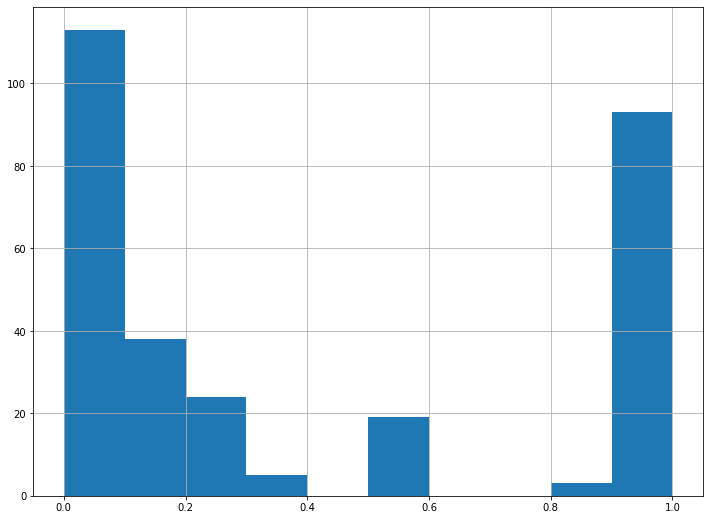

In [23]:
pd.Series(y_predicted_prob[:,1]).hist()

На графике можно наблюдать распределение вероятности для выживших или погибших.

Для регулирования параметра, при котором начинаем считать человека выжившим, изменим пороговое значение вероятности.

In [24]:
y_pred = np.where(y_predicted_prob[:,1] > 0.8, 1, 0)

`0.8` - порог отсечения вероятности, когда начианем считать пассажира выжившим.\
Меняя его значение, мы управляем метриками `precision` и `recall`

In [28]:
precision_score(y_test, y_pred)

0.7916666666666666

In [29]:
recall_score(y_test, y_pred)

0.6333333333333333

### ROC-кривая

ROC-кривая необходима для получения баланса между precision и recall

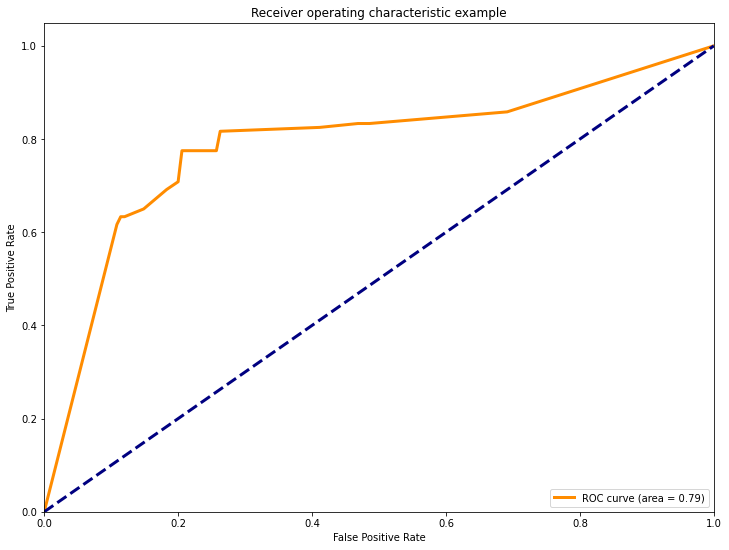

In [32]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
lw = 3
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()